## 거대한 미국 514 주식 + 1298 열 시장 데이터 25Gb
미국 주식에 대한 많은 시장 데이터 +1292 열의 지표 MN1 W1 D1
- RNN 계층의 LSTM 사용

In [1]:
import numpy as np 
import pandas as pd
import os

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 20)
import datetime
from psutil import Process # 실행중인 프로세스 및 시스템 리소스 및 정보 검색을 위한 크로스 플랫폼 라이브러리

In [3]:
from IPython.display import display_html
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
tickers = ["AAPL.US", "AMZN.US", "MSFT.US", "NVDA.US", "TSLA.US", "GOOGL.US", ]
names = ["Apple", "Amazon", "Microsoft", "Nvidia", "Tesla", "Google"]
timeframe = "D1"

In [6]:
ticker = "AAPL.US"
df_AAPL = pd.read_csv(f"/home/leejieun/workspace/kaggle-notebooks/datasets/olegshpagin/extra-us-stocks-market-data/{timeframe}/{ticker}_{timeframe}.csv")
df_AAPL
# /home/leejieun/workspace/kaggle-notebooks/datasets/olegshpagin/extra-us-stocks-market-data

datetime    open    high     low   close     volume  \
0     1998-01-02    0.12    0.14    0.12    0.14  170539824   
1     1998-01-05    0.14    0.14    0.13    0.14  152723900   
2     1998-01-06    0.14    0.17    0.13    0.16  433041952   
3     1998-01-07    0.16    0.16    0.15    0.15  251914152   
4     1998-01-08    0.15    0.16    0.15    0.16  188994988   
5     1998-01-09    0.16    0.17    0.15    0.16  214486244   
6     1998-01-12    0.15    0.16    0.15    0.16  125714764   
7     1998-01-13    0.16    0.17    0.16    0.17  152129936   
8     1998-01-14    0.17    0.17    0.17    0.17  138278308   
9     1998-01-15    0.16    0.17    0.16    0.16  130645452   
...          ...     ...     ...     ...     ...        ...   
6567  2023-12-16  197.15  197.26  197.09  197.17      41019   
6568  2023-12-18  196.09  196.63  194.39  195.88   33031641   
6569  2023-12-19  195.89  196.95  195.88  196.94   21987940   
6570  2023-12-20  196.94  197.68  194.90  194.91   29788975   
6571  2023-12-21  194.91  197.08  193.50  194.79   30439350   
6572  2023-12-22  194.79  195.41  192.97  193.68   30025891   
6573  2023-12-23  193.69  193.69  193.53  193.60    4577635   
6574  2023-12-26  193.61  193.89  192.83  193.10   19406020   
6575  2023-12-27  193.10  193.50  191.09  193.18   30641555   
6576  2023-12-28  193.19  194.66  193.08  193.59   22159316   

      bbands_3_upperband  bbands_3_middleband  bbands_3_lowerband  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                   0.17                 0.15                0.13   
3                   0.17                 0.15                0.13   
4                   0.17                 0.16                0.15   
5                   0.17                 0.16                0.15   
6                   0.16                 0.16                0.16   
7                   0.17                 0.16                0.15   
8                   0.18                 0.17                0.16   
9                   0.18                 0.17                0.16   
...                  ...                  ...                 ...   
6567              198.24               197.45              196.67   
6568              197.96               196.74              195.52   
6569              197.79               196.66              195.54   
6570              197.57               195.91              194.25   
6571              197.52               195.55              193.57   
6572              195.57               194.46              193.35   
6573              195.11               194.02              192.94   
6574              193.97               193.46              192.95   
6575              193.73               193.29              192.85   
6576              193.72               193.29              192.86   

      bbands_4_upperband  bbands_4_middleband  bbands_4_lowerband  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                   0.16                 0.15                0.13   
4                   0.17                 0.15                0.14   
5                   0.17                 0.16                0.15   
6                   0.17                 0.16                0.15   
7                   0.17                 0.16                0.15   
8                   0.17                 0.17                0.16   
9                   0.17                 0.17                0.16   
...                  ...                  ...                 ...   
6567              198.28               197.54              196.80   
6568              198.58               197.06              195.54   
6569              197.86               196.79              195.72   
6570              198.03               196.22              194.42  

In [8]:
df_AAPL.head()

datetime  open  high   low  close     volume  bbands_3_upperband  \
0  1998-01-02  0.12  0.14  0.12   0.14  170539824                 NaN   
1  1998-01-05  0.14  0.14  0.13   0.14  152723900                 NaN   
2  1998-01-06  0.14  0.17  0.13   0.16  433041952                0.17   
3  1998-01-07  0.16  0.16  0.15   0.15  251914152                0.17   
4  1998-01-08  0.15  0.16  0.15   0.16  188994988                0.17   

   bbands_3_middleband  bbands_3_lowerband  bbands_4_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                 0.15                0.13                 NaN   
3                 0.15                0.13                0.16   
4                 0.16                0.15                0.17   

   bbands_4_middleband  bbands_4_lowerband  bbands_5_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                 0.15                0.13                 NaN   
4                 0.15                0.14                0.17   

   bbands_5_middleband  bbands_5_lowerband  bbands_6_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                  NaN                 NaN                 NaN   
4                 0.15                0.13                 NaN   

   bbands_6_middleband  bbands_6_lowerband  bbands_7_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                  NaN                 NaN                 NaN   
4                  NaN                 NaN                 NaN   

   bbands_7_middleband  bbands_7_lowerband  bbands_8_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                  NaN                 NaN                 NaN   
4                  NaN                 NaN                 NaN   

   bbands_8_middleband  bbands_8_lowerband  bbands_9_upperband  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3                  NaN                 NaN                 NaN   
4                  NaN                 NaN                 NaN   

   bbands_9_middleband  bbands_9_lowerband  bbands_10_upperband  \
0                  NaN                 NaN                  NaN   
1                  NaN                 NaN                  NaN   
2                  NaN                 NaN                  NaN   
3                  NaN                 NaN                  NaN   
4                  NaN                 NaN                  NaN   

   bbands_10_middleband  bbands_10_lowerband  bbands_12_upperband  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   NaN                  NaN                  NaN   

   bbands_12_middleband  bbands_12_lowerband  bbands_14_upperband  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3                   NaN                  NaN                  NaN   
4                   N

In [24]:
df_AAPL.columns.isna()

array([False, False, False, ..., False, False, False])

In [11]:
df_AAPL.duplicated().sum()

0

In [12]:
df_AAPL.isnull().sum()

datetime                0
open                    0
high                    0
low                     0
close                   0
volume                  0
bbands_3_upperband      2
bbands_3_middleband     2
bbands_3_lowerband      2
bbands_4_upperband      3
                       ..
willr_30               29
willr_35               34
willr_40               39
willr_45               44
willr_50               49
willr_60               59
willr_70               69
willr_80               79
willr_90               89
willr_100              99
Length: 1298, dtype: int64

In [15]:
list(df_AAPL.columns)

['datetime',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'bbands_3_upperband',
 'bbands_3_middleband',
 'bbands_3_lowerband',
 'bbands_4_upperband',
 'bbands_4_middleband',
 'bbands_4_lowerband',
 'bbands_5_upperband',
 'bbands_5_middleband',
 'bbands_5_lowerband',
 'bbands_6_upperband',
 'bbands_6_middleband',
 'bbands_6_lowerband',
 'bbands_7_upperband',
 'bbands_7_middleband',
 'bbands_7_lowerband',
 'bbands_8_upperband',
 'bbands_8_middleband',
 'bbands_8_lowerband',
 'bbands_9_upperband',
 'bbands_9_middleband',
 'bbands_9_lowerband',
 'bbands_10_upperband',
 'bbands_10_middleband',
 'bbands_10_lowerband',
 'bbands_12_upperband',
 'bbands_12_middleband',
 'bbands_12_lowerband',
 'bbands_14_upperband',
 'bbands_14_middleband',
 'bbands_14_lowerband',
 'bbands_16_upperband',
 'bbands_16_middleband',
 'bbands_16_lowerband',
 'bbands_18_upperband',
 'bbands_18_middleband',
 'bbands_18_lowerband',
 'bbands_20_upperband',
 'bbands_20_middleband',
 'bbands_20_lowerband',
 'bbands_25_

In [25]:
selected_columns = ["datetime", "open", "high", "low", "close", "volume", "roc_10", "roc_20", "roc_50", "sma_10", "sma_20", "sma_50"]

In [26]:
df_all = {}
for ticker in tickers:
    df_all[ticker] = pd.read_csv(f'/home/leejieun/workspace/kaggle-notebooks/datasets/olegshpagin/extra-us-stocks-market-data/{timeframe}/{ticker}_{timeframe}.csv')
    df_all[ticker] = df_all[ticker][selected_columns]

In [32]:
def show_dfs_in_side_by_side(dfs, captions):
    _disp_dfs =[]
    for i in range(len(dfs)):
        _df = dfs[i]
        _caption = captions[i]
        _df_styler = _df.style.set_table_attributes("style='display:inline'").set_caption(_caption)
        _disp_dfs.append(_df_styler._repr_html_())
        display_html(_disp_dfs, raw=True)

In [33]:
dict_values = list(df_all.values())
dict_names= list(df_all.keys())

In [34]:
dfs = dict_values[0]
print(type(dfs))
print(dfs.info())
dfs

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6577 non-null   object 
 1   open      6577 non-null   float64
 2   high      6577 non-null   float64
 3   low       6577 non-null   float64
 4   close     6577 non-null   float64
 5   volume    6577 non-null   int64  
 6   roc_10    6567 non-null   float64
 7   roc_20    6557 non-null   float64
 8   roc_50    6527 non-null   float64
 9   sma_10    6568 non-null   float64
 10  sma_20    6558 non-null   float64
 11  sma_50    6528 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 616.7+ KB
None


datetime    open    high     low   close     volume  roc_10  roc_20  \
0     1998-01-02    0.12    0.14    0.12    0.14  170539824     NaN     NaN   
1     1998-01-05    0.14    0.14    0.13    0.14  152723900     NaN     NaN   
2     1998-01-06    0.14    0.17    0.13    0.16  433041952     NaN     NaN   
3     1998-01-07    0.16    0.16    0.15    0.15  251914152     NaN     NaN   
4     1998-01-08    0.15    0.16    0.15    0.16  188994988     NaN     NaN   
5     1998-01-09    0.16    0.17    0.15    0.16  214486244     NaN     NaN   
6     1998-01-12    0.15    0.16    0.15    0.16  125714764     NaN     NaN   
7     1998-01-13    0.16    0.17    0.16    0.17  152129936     NaN     NaN   
8     1998-01-14    0.17    0.17    0.17    0.17  138278308     NaN     NaN   
9     1998-01-15    0.16    0.17    0.16    0.16  130645452     NaN     NaN   
...          ...     ...     ...     ...     ...        ...     ...     ...   
6567  2023-12-16  197.15  197.26  197.09  197.17      41019    1.91    3.05   
6568  2023-12-18  196.09  196.63  194.39  195.88   33031641    1.80    2.39   
6569  2023-12-19  195.89  196.95  195.88  196.94   21987940    1.40    3.67   
6570  2023-12-20  196.94  197.68  194.90  194.91   29788975   -0.44    2.69   
6571  2023-12-21  194.91  197.08  193.50  194.79   30439350   -0.46    2.34   
6572  2023-12-22  194.79  195.41  192.97  193.68   30025891    0.22    2.29   
6573  2023-12-23  193.69  193.69  193.53  193.60    4577635   -0.53    1.79   
6574  2023-12-26  193.61  193.89  192.83  193.10   19406020   -2.38    1.02   
6575  2023-12-27  193.10  193.50  191.09  193.18   30641555   -2.44    1.01   
6576  2023-12-28  193.19  194.66  193.08  193.59   22159316   -1.82    2.20   

      roc_50  sma_10  sma_20  sma_50  
0        NaN     NaN     NaN     NaN  
1        NaN     NaN     NaN     NaN  
2        NaN     NaN     NaN     NaN  
3        NaN     NaN     NaN     NaN  
4        NaN     NaN     NaN     NaN  
5        NaN     NaN     NaN     NaN  
6        NaN     NaN     NaN     NaN  
7        NaN     NaN     NaN     NaN  
8        NaN     NaN     NaN     NaN  
9        NaN    0.16     NaN     NaN  
...      ...     ...     ...     ...  
6567   10.23  195.61  193.12  185.33  
6568    9.63  195.96  193.35  185.67  
6569   11.20  196.23  193.70  186.07  
6570   10.88  196.15  193.95  186.45  
6571   11.02  196.06  194.18  186.84  
6572   12.04  196.10  194.39  187.26  
6573   11.93  196.00  194.56  187.67  
6574   11.36  195.53  194.66  188.06  
6575   12.91  195.04  194.76  188.51  
6576   16.04  194.68  194.96  189.04  

[6577 rows x 12 columns]

In [35]:
n = 30
dict_values_n = [dict_values[i][:n] for i in range(len(dict_values))]

In [36]:
show_dfs_in_side_by_side(dfs= dict_values_n, captions=dict_names)

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 

 
 AMZN.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 3.000000

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 

 
 AMZN.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 3.000000

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 

 
 AMZN.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 3.000000

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 

 
 AMZN.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 3.000000

AAPL.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 0.120000 
 0.140000 
 0.120000 
 0.140000 
 170539824 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 1 
 1998-01-05 
 0.140000 
 0.140000 
 0.130000 
 0.140000 
 152723900 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 2 
 1998-01-06 
 0.140000 
 0.170000 
 0.130000 
 0.160000 
 433041952 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 3 
 1998-01-07 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 251914152 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 4 
 1998-01-08 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 188994988 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 5 
 1998-01-09 
 0.160000 
 0.170000 
 0.150000 
 0.160000 
 214486244 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 6 
 1998-01-12 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 125714764 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 7 
 1998-01-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 152129936 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 8 
 1998-01-14 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 138278308 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 9 
 1998-01-15 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 130645452 
 nan 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 10 
 1998-01-16 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 59346056 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 11 
 1998-01-20 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 58293284 
 14.290000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 12 
 1998-01-21 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 45488800 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 13 
 1998-01-22 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 80449768 
 13.330000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 14 
 1998-01-23 
 0.170000 
 0.170000 
 0.170000 
 0.170000 
 57682800 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 15 
 1998-01-26 
 0.170000 
 0.170000 
 0.160000 
 0.170000 
 34151796 
 6.250000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 16 
 1998-01-27 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 26947256 
 0.000000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 17 
 1998-01-28 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 36831200 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 18 
 1998-01-29 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 50573712 
 -5.880000 
 nan 
 nan 
 0.160000 
 nan 
 nan 
 
 
 19 
 1998-01-30 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 37920484 
 0.000000 
 nan 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 20 
 1998-02-02 
 0.160000 
 0.160000 
 0.150000 
 0.150000 
 131743220 
 -6.250000 
 7.140000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 21 
 1998-02-03 
 0.150000 
 0.160000 
 0.150000 
 0.160000 
 92486912 
 0.000000 
 14.290000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 22 
 1998-02-04 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 41622028 
 0.000000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 23 
 1998-02-05 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 56201600 
 -5.880000 
 6.670000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 24 
 1998-02-06 
 0.160000 
 0.160000 
 0.160000 
 0.160000 
 49338884 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 25 
 1998-02-09 
 0.160000 
 0.170000 
 0.160000 
 0.160000 
 116942000 
 -5.880000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 26 
 1998-02-10 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 102617284 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 27 
 1998-02-11 
 0.170000 
 0.170000 
 0.160000 
 0.160000 
 46376456 
 0.000000 
 -5.880000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 28 
 1998-02-12 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 47586140 
 6.250000 
 0.000000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 29 
 1998-02-13 
 0.160000 
 0.170000 
 0.160000 
 0.170000 
 51259600 
 6.250000 
 6.250000 
 nan 
 0.160000 
 0.160000 
 nan 
 
 
 

 
 AMZN.US 
 
 
   
 datetime 
 open 
 high 
 low 
 close 
 volume 
 roc_10 
 roc_20 
 roc_50 
 sma_10 
 sma_20 
 sma_50 
 
 
 
 
 0 
 1998-01-02 
 3.000000

In [37]:
def reduce_mem_usage(df, verbose=0):
    """function to reduce memory usage for dataframe"""
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        try:
            col_type = df[col].dtype
            if col_type != object:
                c_min = df[col].min()
                c_max = df[col].max()
                
                if str(col_type)[:3] == "int":
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float32)
        except:
            pass
    if verbose:
        print(f"Memory usage of dataframe is {start_mem:.2f} MB")
        end_mem = df.memory_usage().sum() / 1024**2
        print(f"Memory usage after optimization is: {end_mem:.2f} MB")
        decrease = 100 * (start_mem - end_mem) / start_mem
        print(f"Decreased by {decrease:.2f}%")
    return df

In [38]:
def checkMemory():
    """This function defines the memory usage across the kernel. Source - https://stackoverflow.com/questions/61366458/how-to-find-memory-usage-of-kaggle-notebook"""
    pid = os.getpid()
    py = Process(pid)
    memory_use = py.memory_info()[0] / 2. ** 30
    return f"RAM memory GB usage = {memory_use :.4}"
checkMemory()

'RAM memory GB usage = 0.3878'

In [39]:
df_AAPL = reduce_mem_usage(df_AAPL, verbose=1)

Memory usage of dataframe is 65.13 MB
Memory usage after optimization is: 32.59 MB
Decreased by 49.96%


In [41]:
df_AAPL

datetime        open        high         low       close     volume  \
0     1998-01-02    0.120000    0.140000    0.120000    0.140000  170539824   
1     1998-01-05    0.140000    0.140000    0.130000    0.140000  152723900   
2     1998-01-06    0.140000    0.170000    0.130000    0.160000  433041952   
3     1998-01-07    0.160000    0.160000    0.150000    0.150000  251914152   
4     1998-01-08    0.150000    0.160000    0.150000    0.160000  188994988   
5     1998-01-09    0.160000    0.170000    0.150000    0.160000  214486244   
6     1998-01-12    0.150000    0.160000    0.150000    0.160000  125714764   
7     1998-01-13    0.160000    0.170000    0.160000    0.170000  152129936   
8     1998-01-14    0.170000    0.170000    0.170000    0.170000  138278308   
9     1998-01-15    0.160000    0.170000    0.160000    0.160000  130645452   
...          ...         ...         ...         ...         ...        ...   
6567  2023-12-16  197.149994  197.259995  197.089996  197.169998      41019   
6568  2023-12-18  196.089996  196.630005  194.389999  195.880005   33031641   
6569  2023-12-19  195.889999  196.949997  195.880005  196.940002   21987940   
6570  2023-12-20  196.940002  197.679993  194.899994  194.910004   29788975   
6571  2023-12-21  194.910004  197.080002  193.500000  194.789993   30439350   
6572  2023-12-22  194.789993  195.410004  192.970001  193.679993   30025891   
6573  2023-12-23  193.690002  193.690002  193.529999  193.600006    4577635   
6574  2023-12-26  193.610001  193.889999  192.830002  193.100006   19406020   
6575  2023-12-27  193.100006  193.500000  191.089996  193.179993   30641555   
6576  2023-12-28  193.190002  194.660004  193.080002  193.589996   22159316   

      bbands_3_upperband  bbands_3_middleband  bbands_3_lowerband  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2               0.170000             0.150000            0.130000   
3               0.170000             0.150000            0.130000   
4               0.170000             0.160000            0.150000   
5               0.170000             0.160000            0.150000   
6               0.160000             0.160000            0.160000   
7               0.170000             0.160000            0.150000   
8               0.180000             0.170000            0.160000   
9               0.180000             0.170000            0.160000   
...                  ...                  ...                 ...   
6567          198.240005           197.449997          196.669998   
6568          197.960007           196.740005          195.520004   
6569          197.789993           196.660004          195.539993   
6570          197.570007           195.910004          194.250000   
6571          197.520004           195.550003          193.570007   
6572          195.570007           194.460007          193.350006   
6573          195.110001           194.020004          192.940002   
6574          193.970001           193.460007          192.949997   
6575          193.729996           193.289993          192.850006   
6576          193.720001           193.289993          192.860001   

      bbands_4_upperband  bbands_4_middleband  bbands_4_lowerband  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3               0.160000             0.150000            0.130000   
4               0.170000             0.150000            0.140000   
5               0.170000             0.160000            0.150000   
6               0.170000             0.160000            0.150000   
7               0.170000             0.160000            0.150000   
8               0.170000             0.170000            0.160000   
9               0.170000             0.170000            0.1

In [42]:
checkMemory()

'RAM memory GB usage = 0.3919'

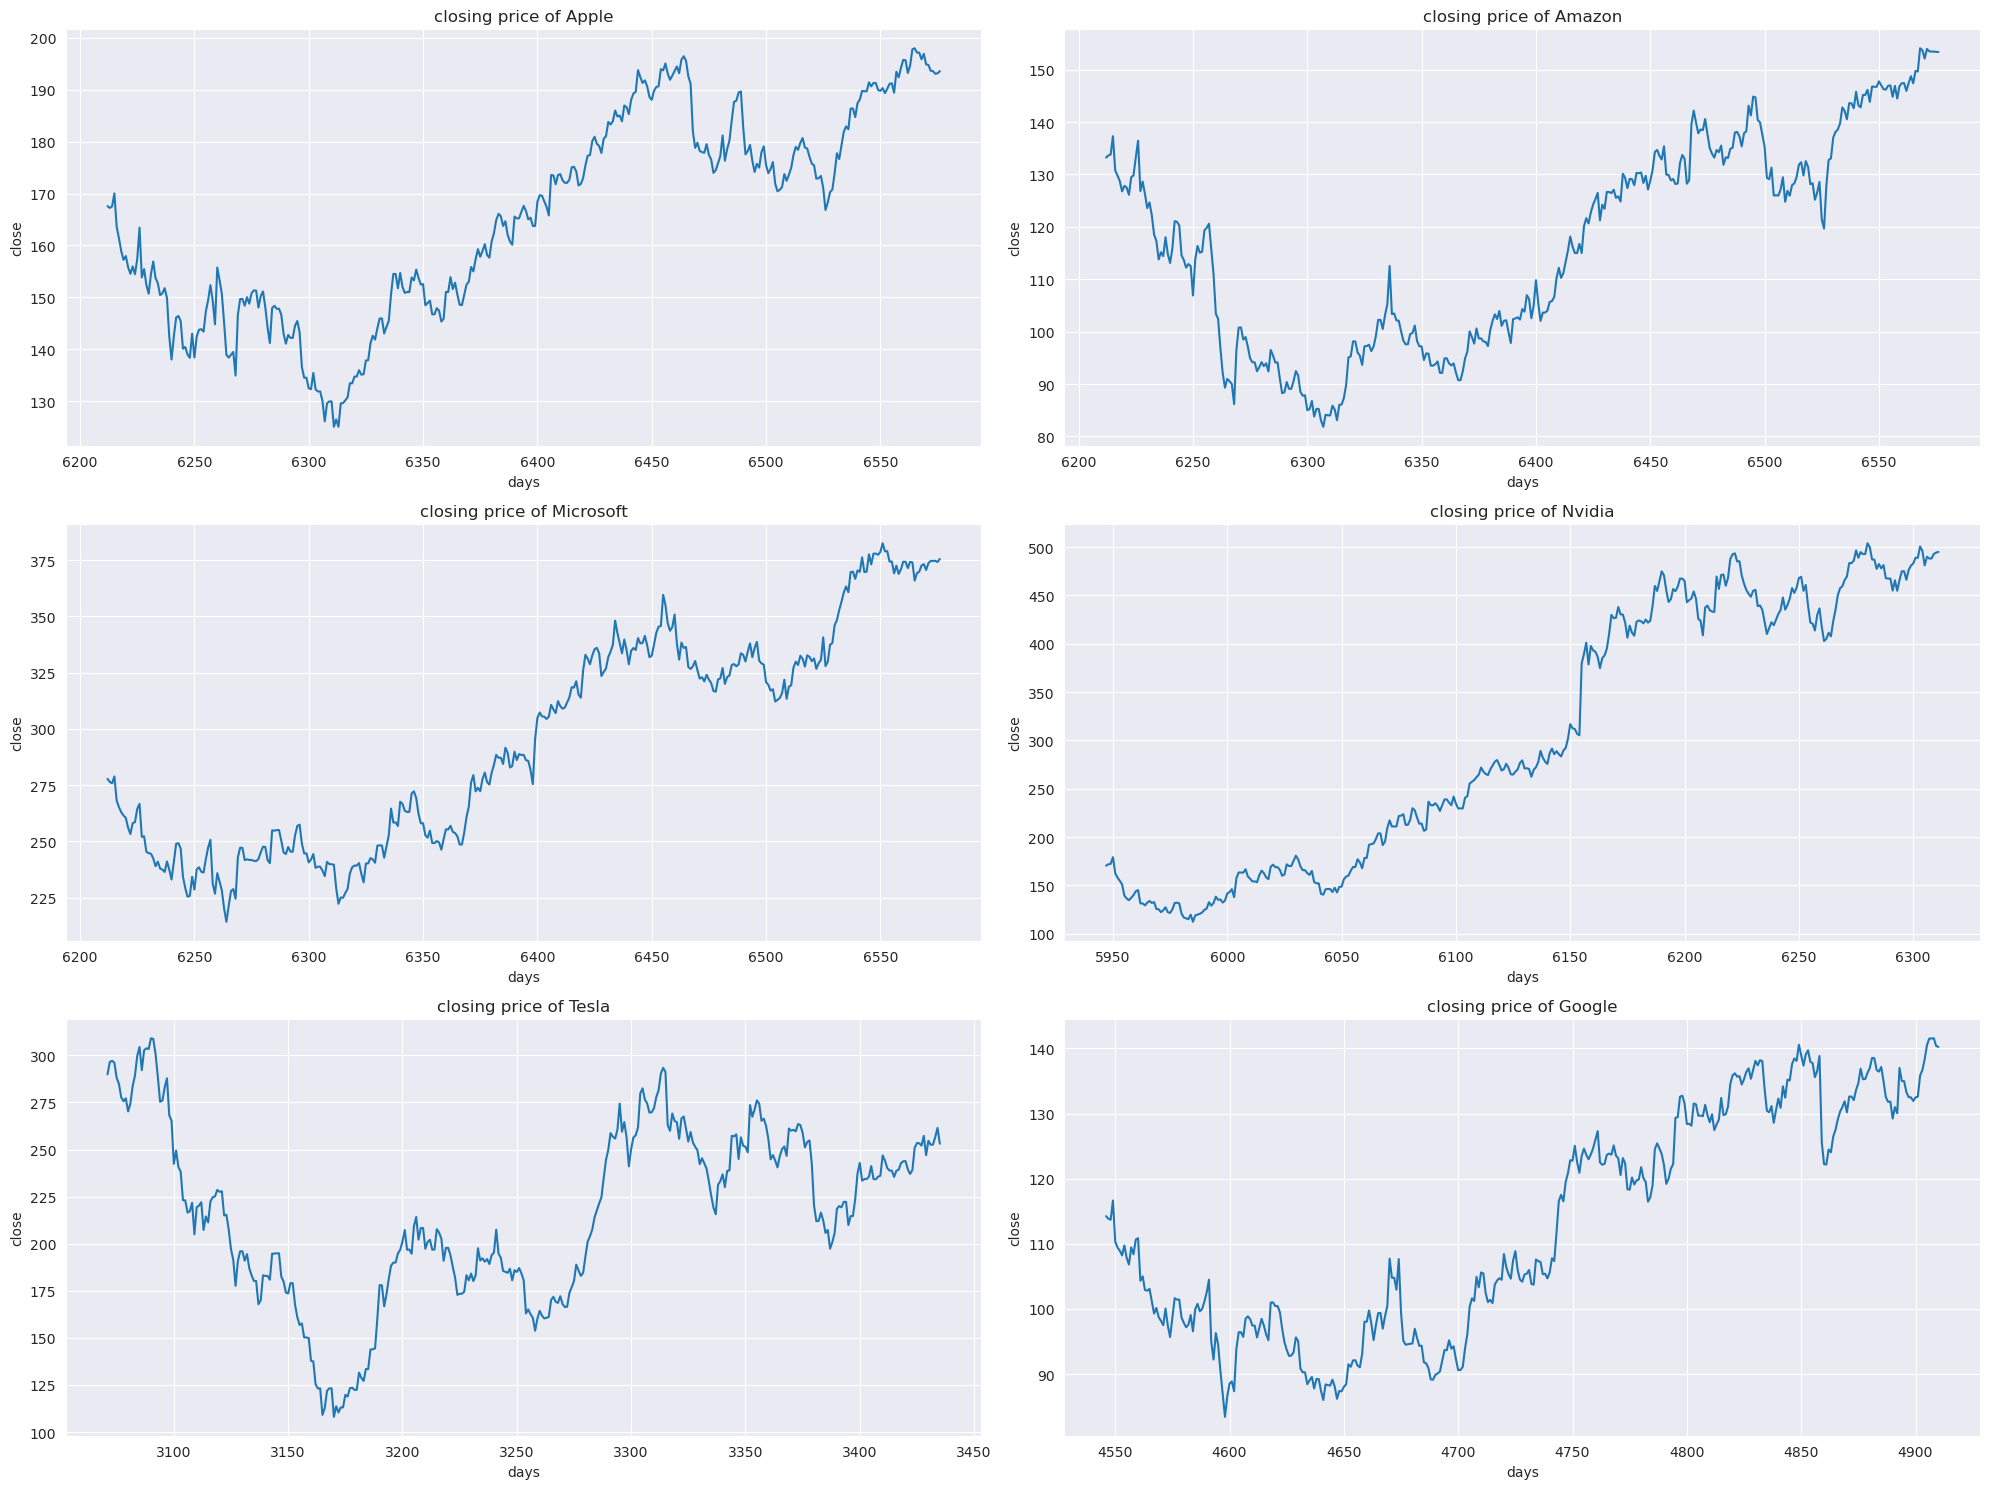

In [53]:
num_prices = 365

plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(df_all, 1):
    plt.subplot(3, 2, i)
    df_all[ticker]['close'][len(df_all[ticker]['close'])-num_prices:].plot()
    plt.ylabel('close')
    plt.xlabel('days')
    plt.title(f'closing price of {names[i -1]}')
    
plt.tight_layout()
plt.show()


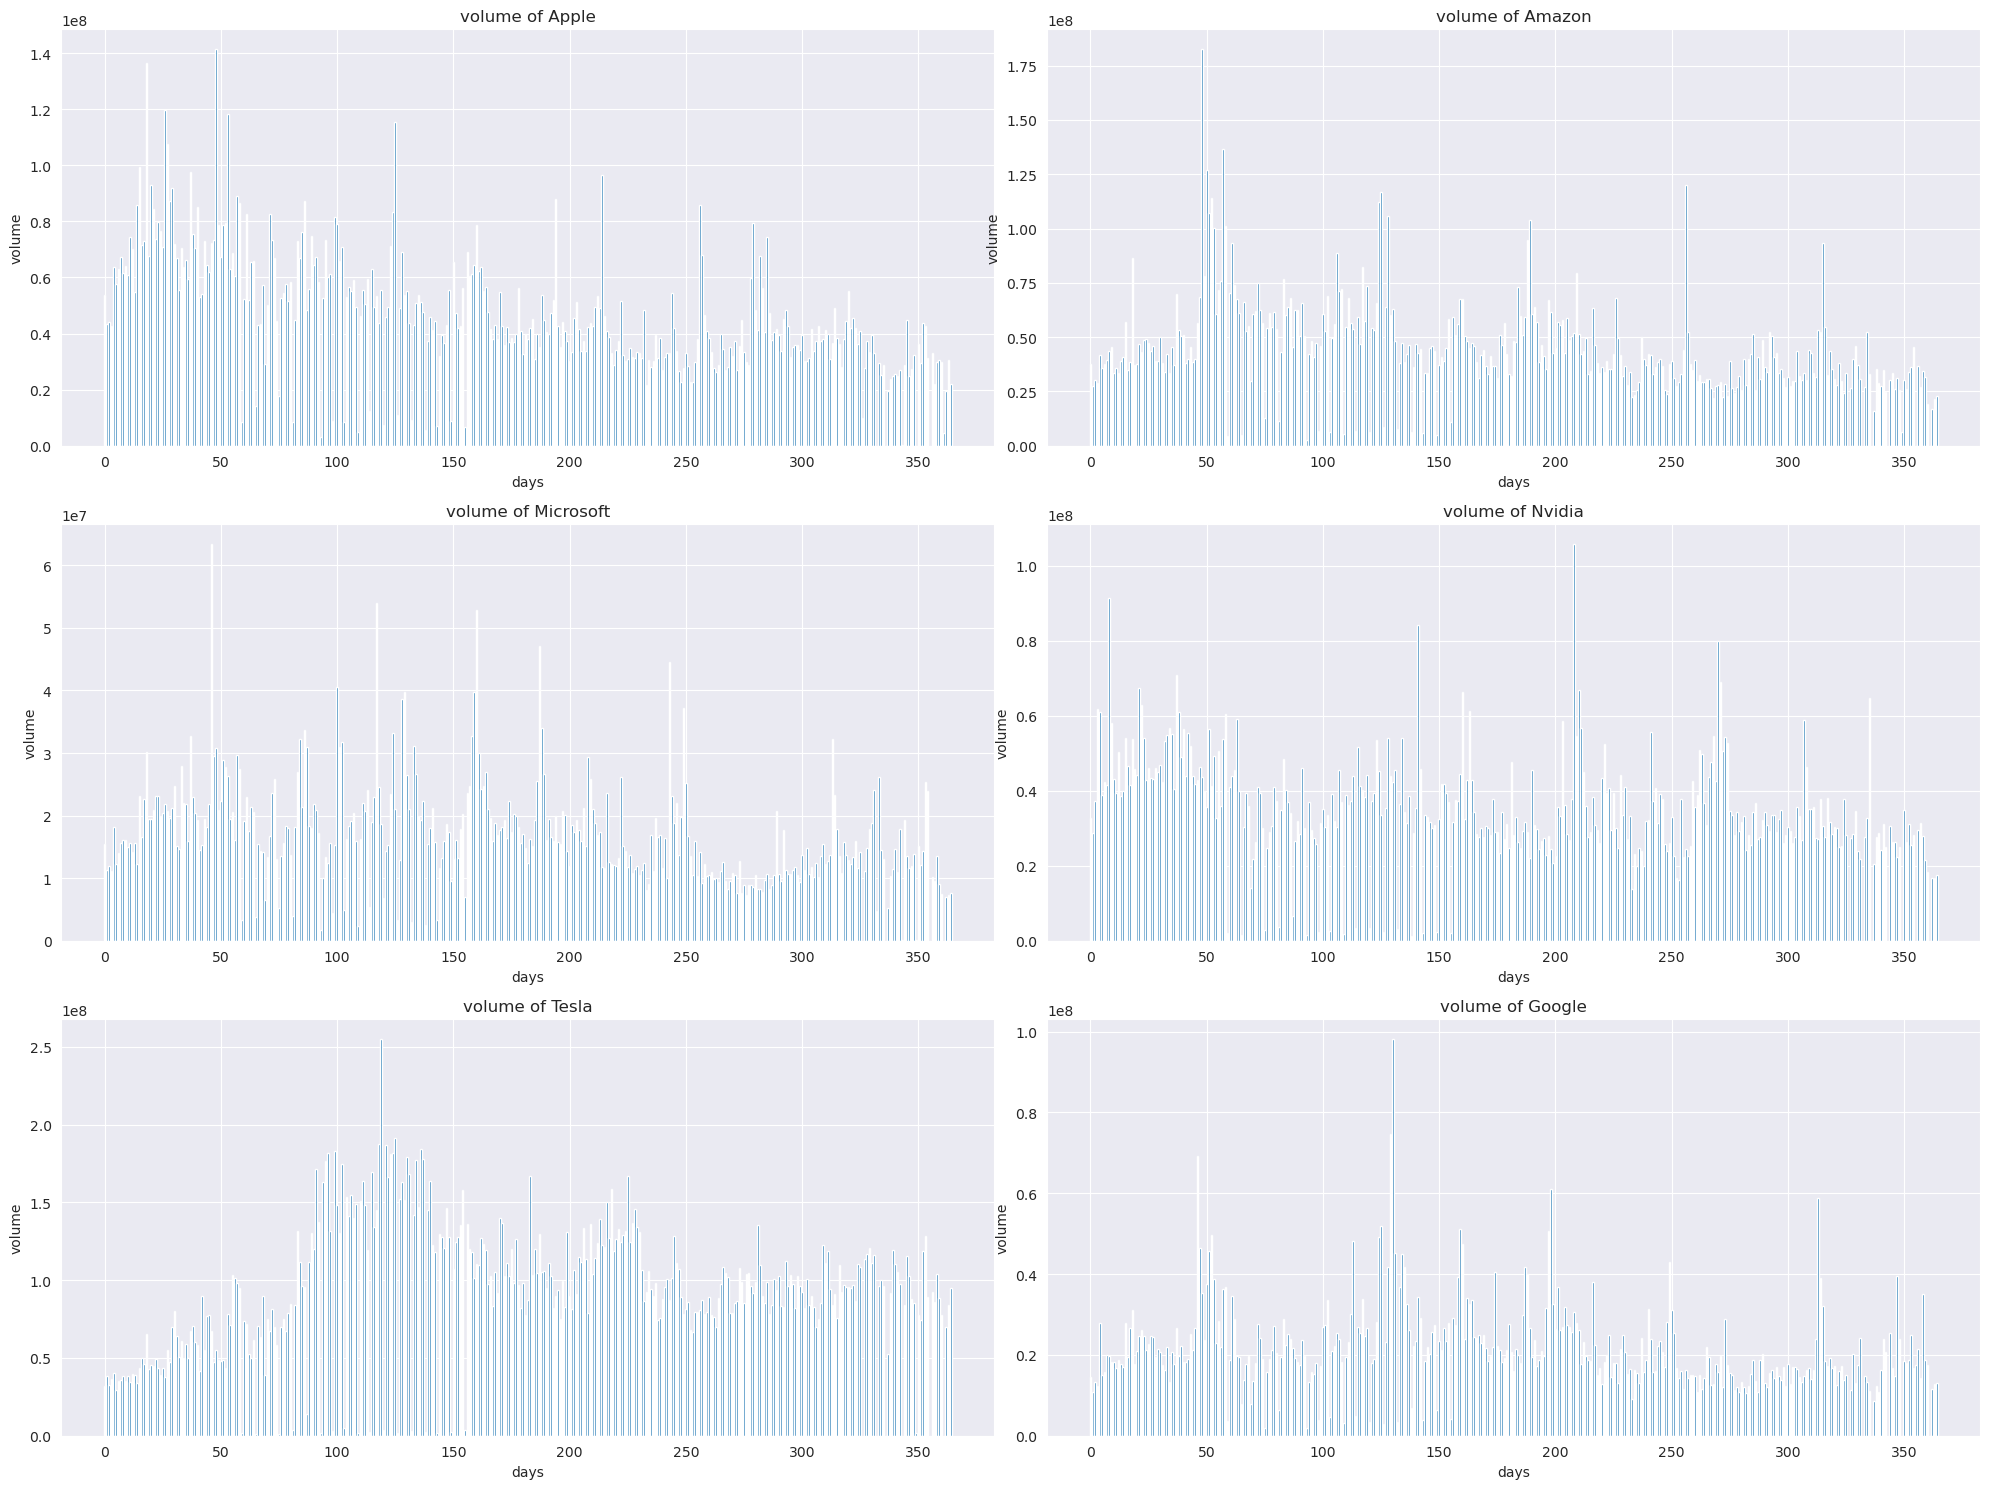

In [55]:
num_prices = 365  # how many days to show

plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(df_all, 1):
    plt.subplot(3, 2, i)
    plt.bar(list(range(num_prices)), df_all[ticker]['volume'][len(df_all[ticker]['volume'])-num_prices:], width=0.7)
    plt.ylabel('volume')
    plt.xlabel('days')
    plt.title(f"volume of {names[i - 1]}")

plt.tight_layout()

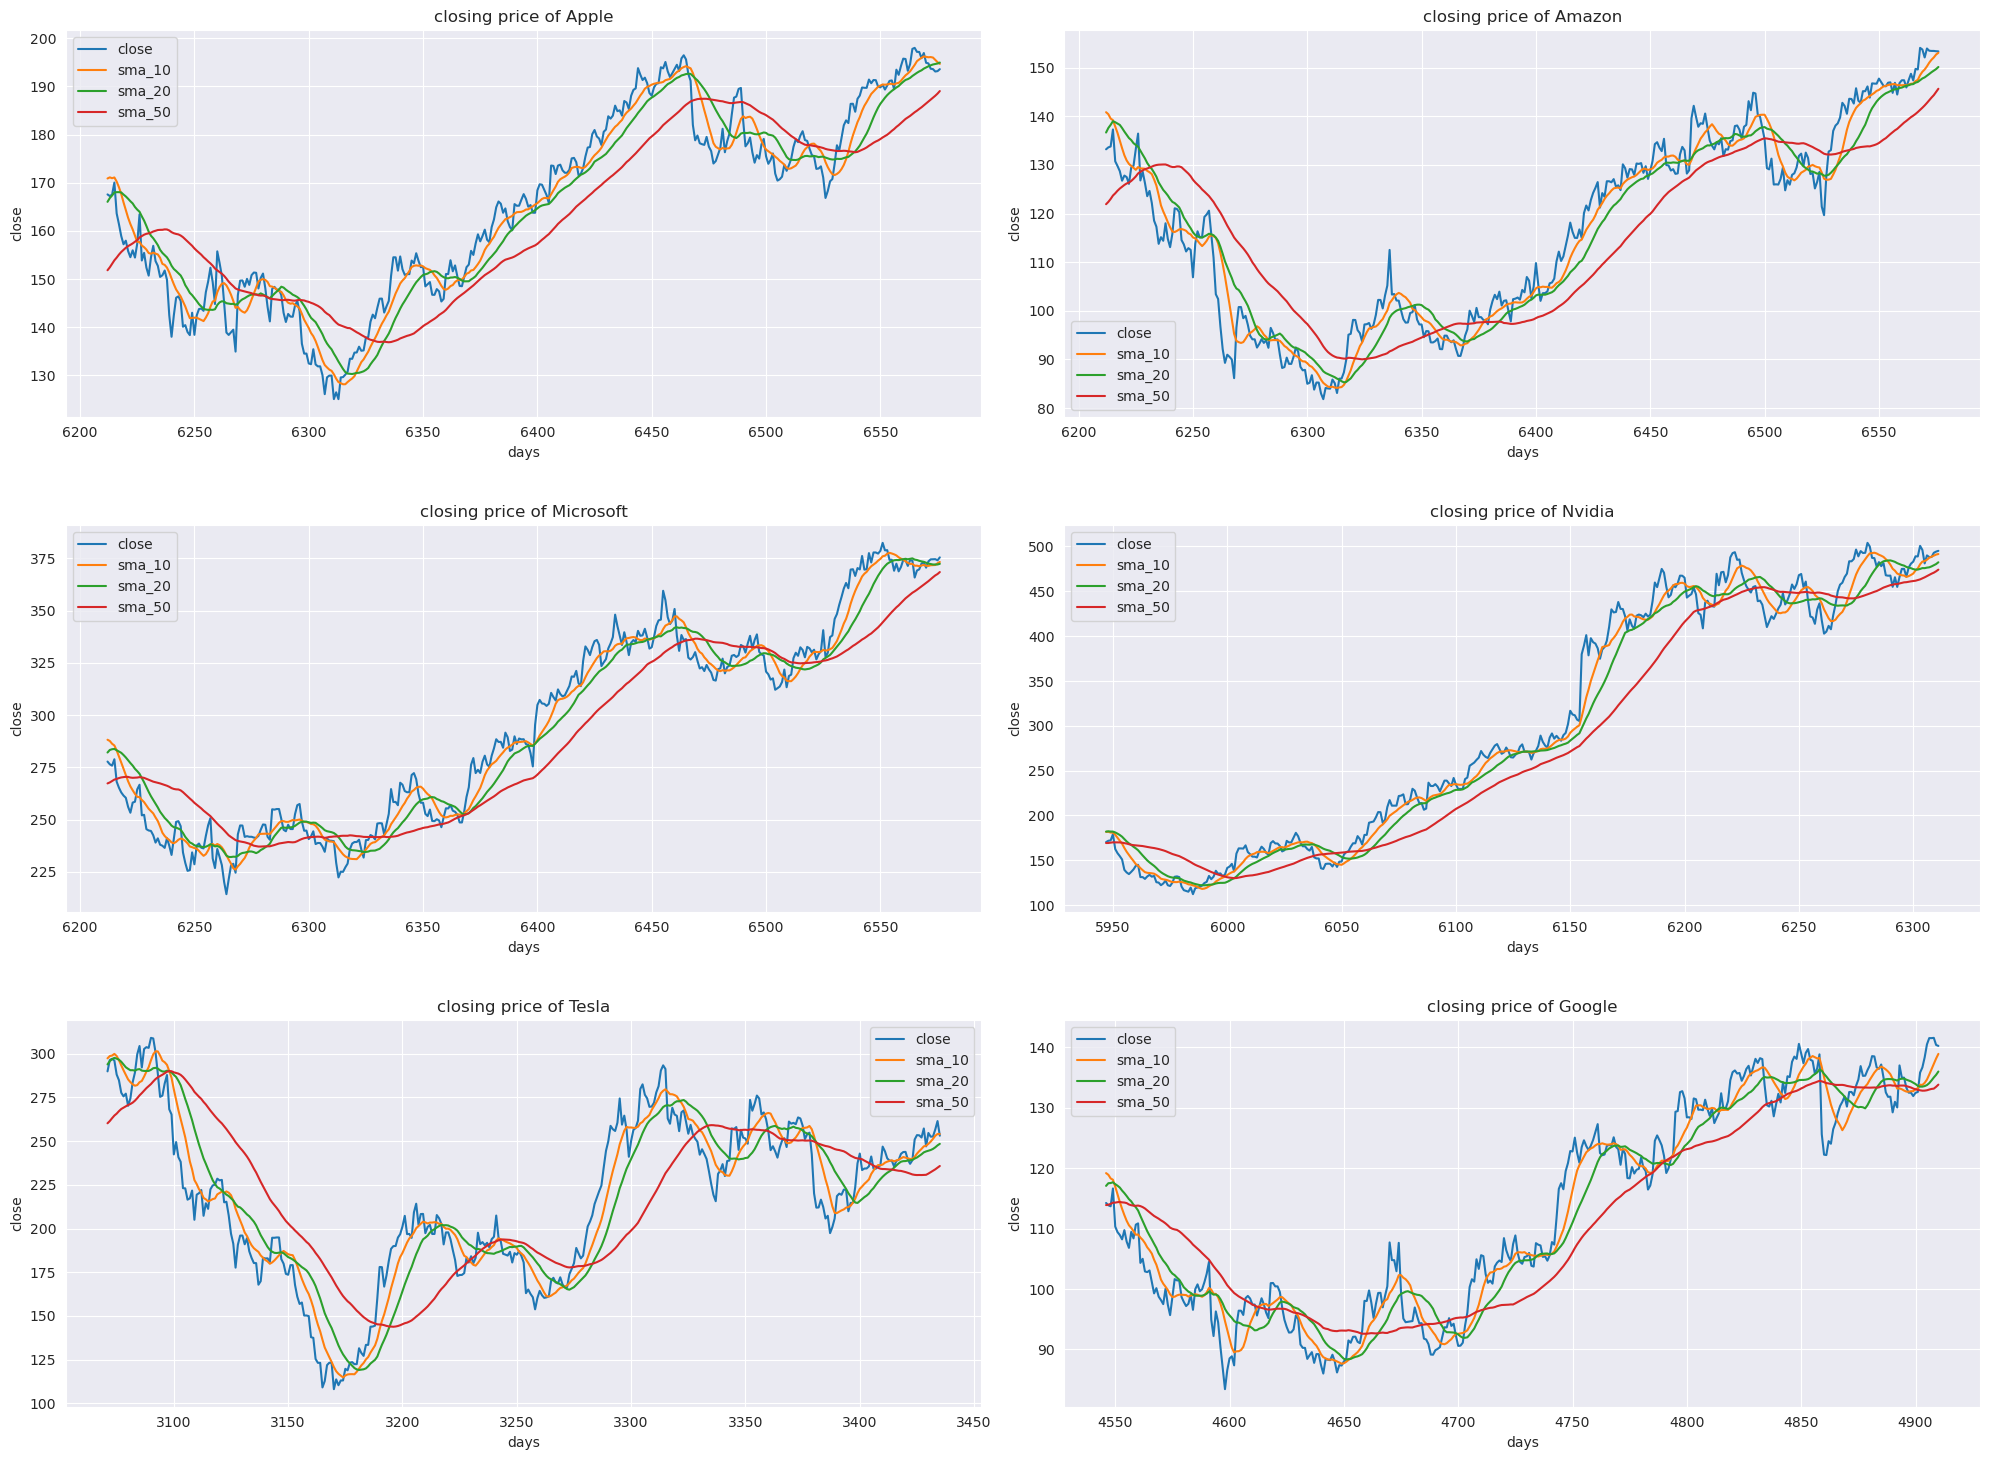

In [57]:
num_prices = 365  # how many days to show

plt.figure(figsize=(20, 15))
sns.set_style('darkgrid')
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(df_all, 1):
    plt.subplot(3, 2, i)
    df_all[ticker]['close'][len(df_all[ticker]['close'])-num_prices:].plot()
    df_all[ticker]['sma_10'][len(df_all[ticker]['sma_10'])-num_prices:].plot()
    df_all[ticker]['sma_20'][len(df_all[ticker]['sma_20'])-num_prices:].plot()
    df_all[ticker]['sma_50'][len(df_all[ticker]['sma_50'])-num_prices:].plot()
    plt.ylabel('close')
    plt.xlabel('days')
    plt.title(f"closing price of {names[i - 1]}")
    plt.legend()

plt.tight_layout()

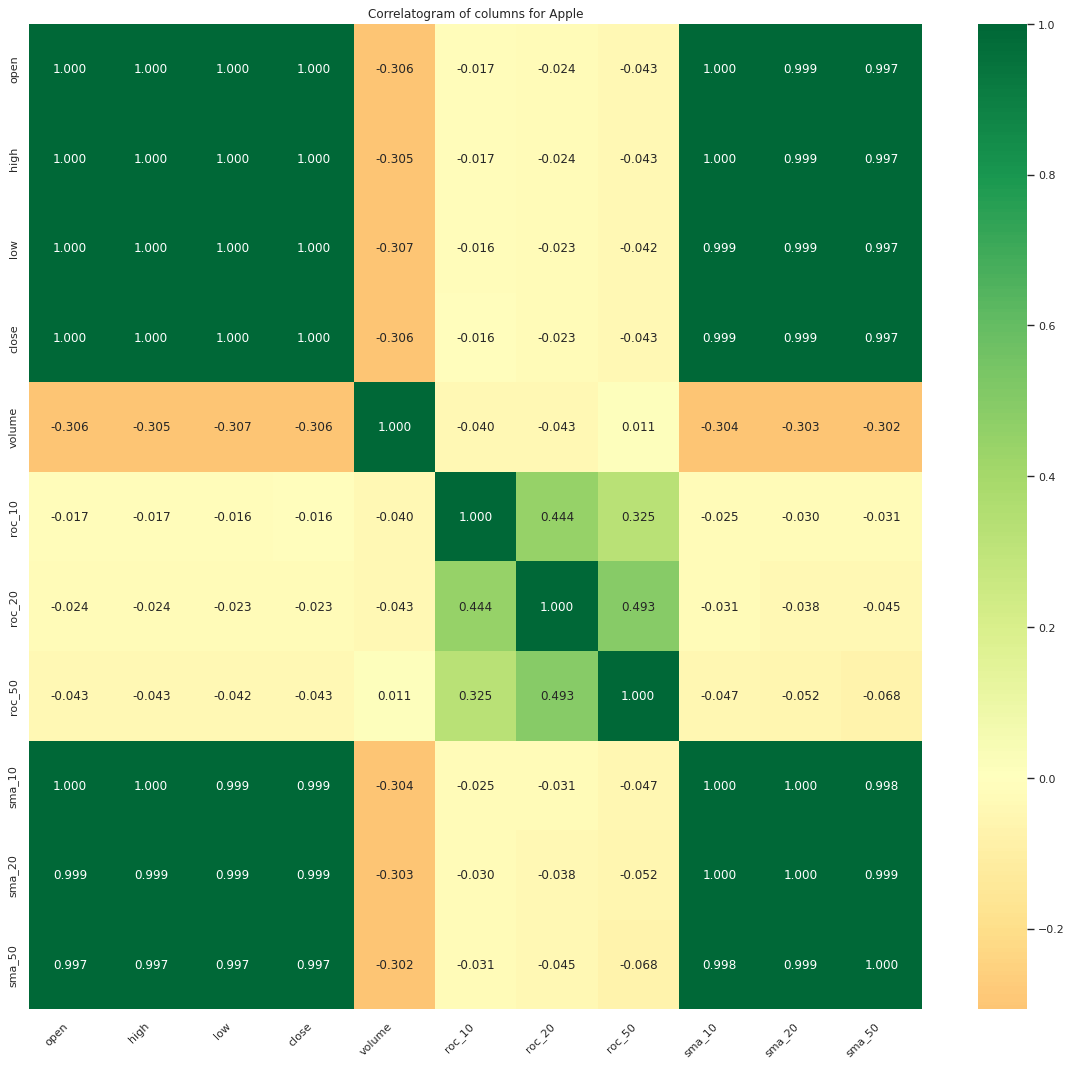

In [59]:
sns.set(font_scale=0.9)
df_filtered = df_AAPL.copy()
df_filtered = df_filtered[selected_columns]
df_filtered = df_filtered.drop('datetime', axis=1)

plt.figure(figsize=(18,16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.3f')
plt.title(f'Correlatogram of columns for Apple')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()